<a href="https://colab.research.google.com/github/Jason131sx/CSC324/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
This is the the data that shows air quality and water pollution around the world in 2020.

For showing this data, I would like to increase people's awareness of environmental protection, protect nature, and eliminate waste. In this way, our planet, country and city can be better. Our quality of life will be better, and our body will be more healthy.


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [3]:
fp_df = pd.read_csv("cities_air_quality_water_pollution.18-10-2021.csv")
fp_df.head()

,City,Region,Country,AirQuality,WaterPollution
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435


In [4]:
fp_df.head(10)

,City,Region,Country,AirQuality,WaterPollution
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435
5,Bern,"""Canton of Bern""","""Switzerland""",94.318182,12.500000
6,Geneva,"""Canton of Geneva""","""Switzerland""",71.538462,17.372881
7,Zurich,"""Canton of Zurich""","""Switzerland""",83.809524,10.714286
8,Basel,"""""","""Switzerland""",81.666667,26.923077
9,London,"""England""","""United Kingdom""",37.042254,40.716374


# The overall average for air quality and waterpollution in the world

### In here, I will show the average air quality and waterpollution for the world as a whole

In [5]:
fp_df['AirQuality'].mean()

62.2534517395642

In [6]:
fp_df['WaterPollution'].mean()

44.63537214186169

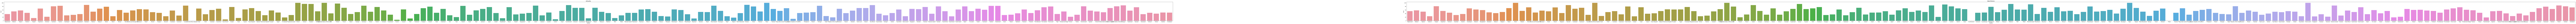

In [79]:
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.2, left = 90, right = 160)
for idx in range(2):
    plt.subplot(1,2, idx+1)
    country_df = fp_df.groupby("Country")[list(fp_df.columns[-2:])[idx]].mean()
    sns.barplot(x=country_df.index, y=country_df.values)
    plt.ylabel("Num")
    plt.title(list(fp_df.columns[-2:])[idx])
    
plt.show()

# Top Countries with the best Air Quality and Least WaterPollution

Air Quality

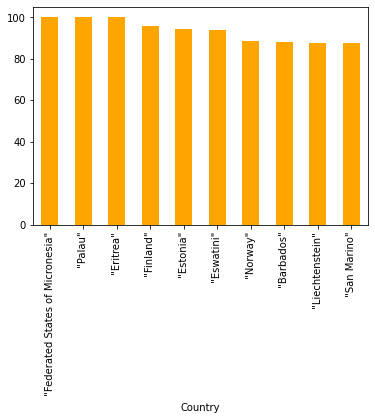

In [94]:
top_AQ=fp_df.groupby('Country')['AirQuality'].mean().sort_values(ascending=False)[:10]
top_AQ.plot(kind='bar', color='orange')
plt.show()

In [9]:
top_AQ

Country
 "Federated States of Micronesia"    100.000000
 "Palau"                             100.000000
 "Eritrea"                           100.000000
 "Finland"                            95.771386
 "Estonia"                            94.190796
 "Eswatini"                           93.750000
 "Norway"                             88.684587
 "Barbados"                           88.333333
 "Liechtenstein"                      87.500000
 "San Marino"                         87.500000
Name: AirQuality, dtype: float64

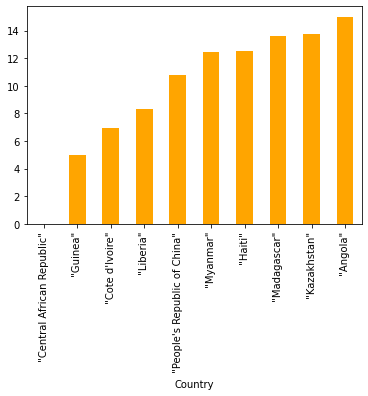

In [93]:
bottom_AQ=fp_df.groupby('Country')['AirQuality'].mean().sort_values(ascending=True)[:10]
bottom_AQ.plot(kind='bar', color='orange')
plt.show()

In [11]:
bottom_AQ

Country
 "Central African Republic"       0.000000
 "Guinea"                         5.000000
 "Cote d'Ivoire"                  6.944444
 "Liberia"                        8.333333
 "People's Republic of China"    10.761067
 "Myanmar"                       12.462207
 "Haiti"                         12.500000
 "Madagascar"                    13.636364
 "Kazakhstan"                    13.737825
 "Angola"                        15.000000
Name: AirQuality, dtype: float64

Water Pollution

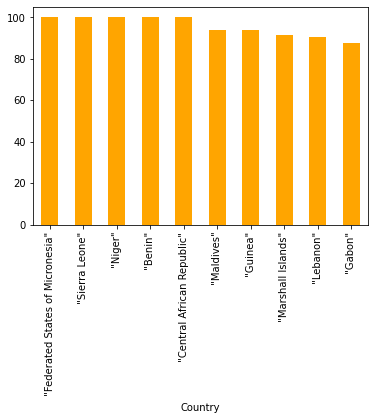

In [84]:
top_WP=fp_df.groupby('Country')['WaterPollution'].mean().sort_values(ascending=False)[:10]
top_WP.plot(kind='bar', color='orange')
plt.show()

In [13]:
top_WP

Country
 "Federated States of Micronesia"    100.000000
 "Sierra Leone"                      100.000000
 "Niger"                             100.000000
 "Benin"                             100.000000
 "Central African Republic"          100.000000
 "Maldives"                           93.750000
 "Guinea"                             93.750000
 "Marshall Islands"                   91.666667
 "Lebanon"                            90.763449
 "Gabon"                              87.500000
Name: WaterPollution, dtype: float64

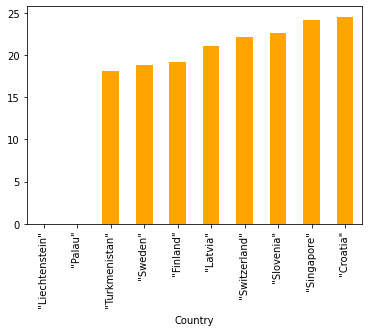

In [86]:
bottom_WP=fp_df.groupby('Country')['WaterPollution'].mean().sort_values(ascending=True)[:10]
bottom_WP.plot(kind='bar', color='orange')
plt.show()

In [15]:
bottom_WP

Country
 "Liechtenstein"     0.000000
 "Palau"             0.000000
 "Turkmenistan"     18.055556
 "Sweden"           18.842412
 "Finland"          19.231145
 "Latvia"           21.131815
 "Switzerland"      22.089957
 "Slovenia"         22.613987
 "Singapore"        24.204947
 "Croatia"          24.544349
Name: WaterPollution, dtype: float64

# **Air quality and water pollution in cites**
The data shows the air quality and water pollution in each cities

In [16]:
City_AQ = fp_df.groupby('City')['AirQuality'].mean()
City_AQ

City
Aachen      70.454545
Aalen       87.500000
Aarau       87.500000
Aarschot    75.000000
Aba          0.000000
              ...    
Zunyi        0.000000
Zurich      83.809524
Zvolen      87.500000
Zwickau     75.000000
Zywiec      50.000000
Name: AirQuality, Length: 3796, dtype: float64

In [17]:
City_AQ['New York City']

46.81603774

In [19]:
City_WP = fp_df.groupby('City')['WaterPollution'].mean()
City_WP

City
Aachen      17.857143
Aalen       50.000000
Aarau        0.000000
Aarschot    41.666667
Aba         50.000000
              ...    
Zunyi       50.000000
Zurich      10.714286
Zvolen      50.000000
Zwickau     50.000000
Zywiec      50.000000
Name: WaterPollution, Length: 3796, dtype: float64

In [20]:
City_WP['New York City']

49.5049505

The air quality in my city (New York City, New York) is 46.8 out of 100, which is 15.45 lower than the average of 62.25. This is something I didn't expect. It may be that there are too few cities I have visited. I think the air I breathe hasn't changed much, but in fact the quality of the air I breathe is really not high. The level of water pollution in New York City is 49.5 out of 100, which is 0.5 below the average of 50. Although this is good, because the number of water pollution is closer to 0, the better, but in fact it is not much better.

Text(0.5, 0.98, 'Categorical Plotting')

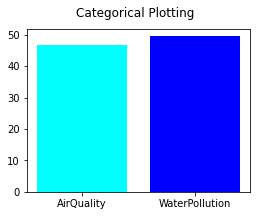

In [92]:
data = {'AirQuality': 46.81, 'WaterPollution': 49.5}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, figsize=(4, 3), sharey=True)
axs.bar(names, values, color=['cyan', 'blue'])
fig.suptitle('Categorical Plotting')

Maybe you guys would think that it’s not you that who don’t have water to drink so you know about this but you don’t care. Then I would tell that you are wrong, just like the information I gave in the city where we live. The air quality for the air is not very high and breathing low quality air will make our body sick and weak, which can lead to diseases. So you need to be more aware of the concept of environmental protection and then change it slowly. One person may not change much, but if there are more people it can change more, and finally we can change the world.
